# CLUSTERING ANALYSIS

Understanding and Implementing K-Means and DBSCAN
Dataset: EastWestAirlines

## 1. Data Loading & Preprocessing
1️⃣ Load the dataset

In [12]:
import pandas as pd

df = pd.read_excel("EastWestAirlines.xlsx")
df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


2️⃣ Basic exploration

In [14]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


### 4️⃣ Remove identifier column

Customer IDs do not help clustering.

In [16]:
df = df.drop(columns=['ID#'])


### 5️⃣ Outlier handling (IQR method)

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


### 6️⃣ Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)


## 2. Exploratory Data Analysis (EDA)
### 1️⃣ Histograms

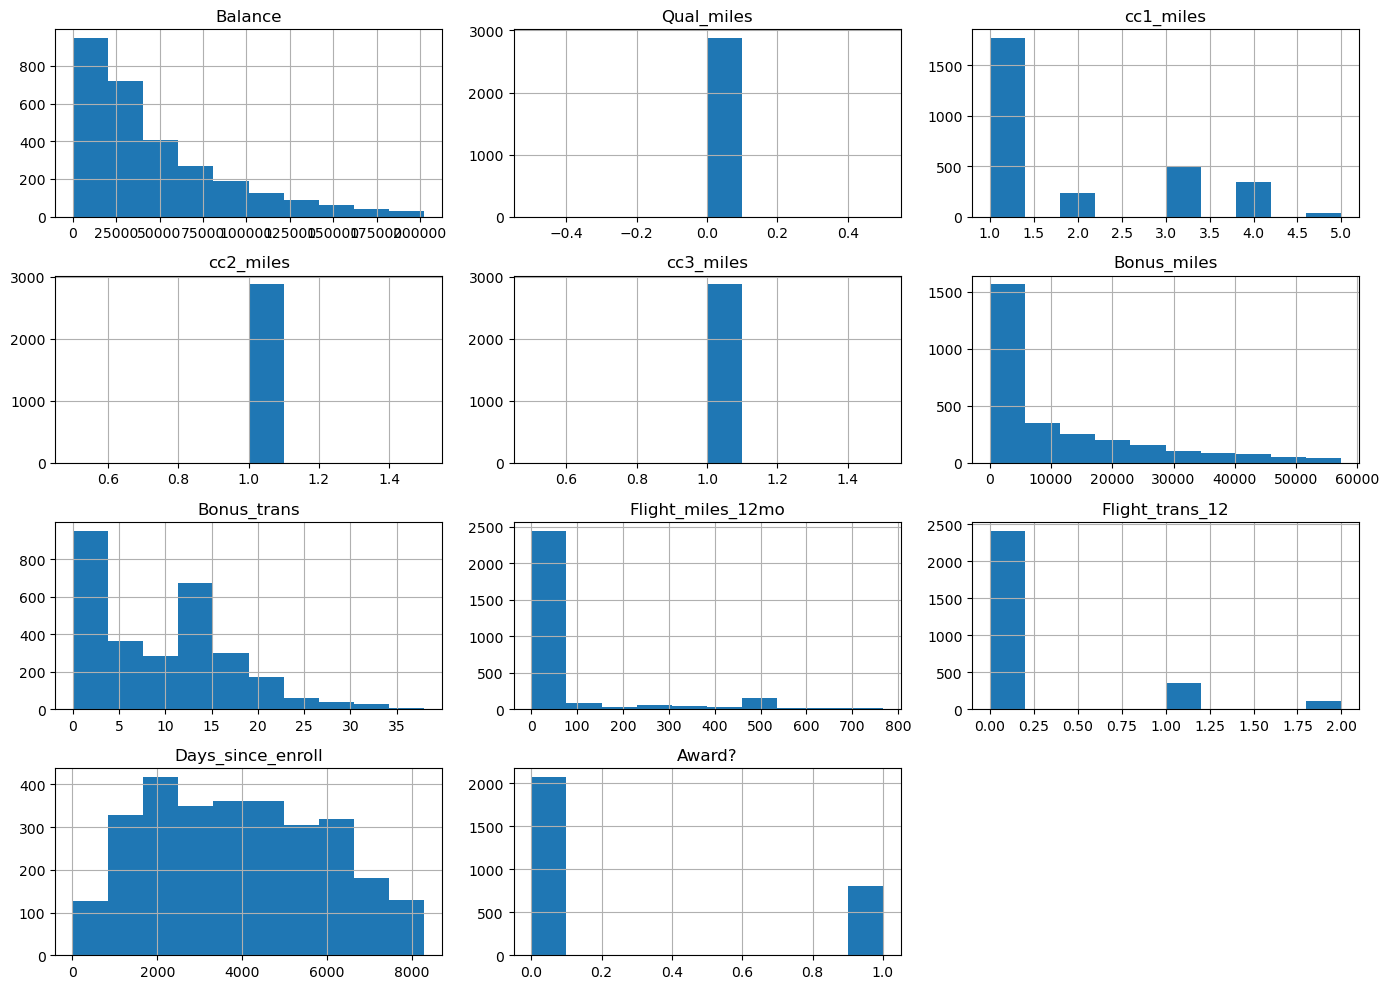

In [27]:
import matplotlib.pyplot as plt

df_clean.hist(figsize=(14,10))
plt.tight_layout()
plt.show()


### 2️⃣ Correlation heatmap

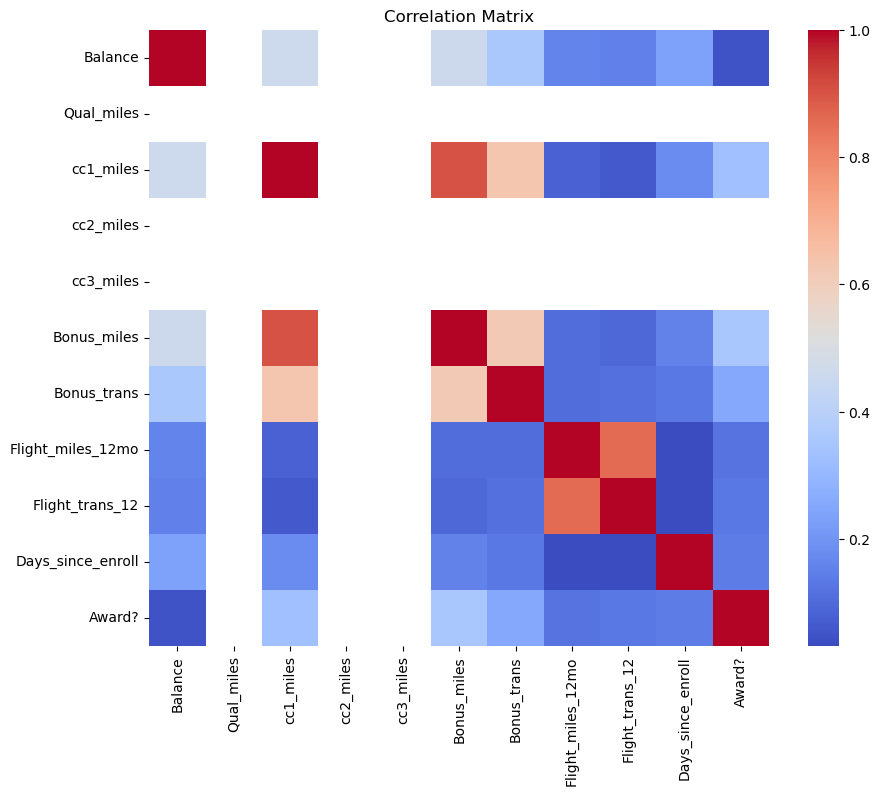

In [30]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


### 3️⃣ Pairwise visualization

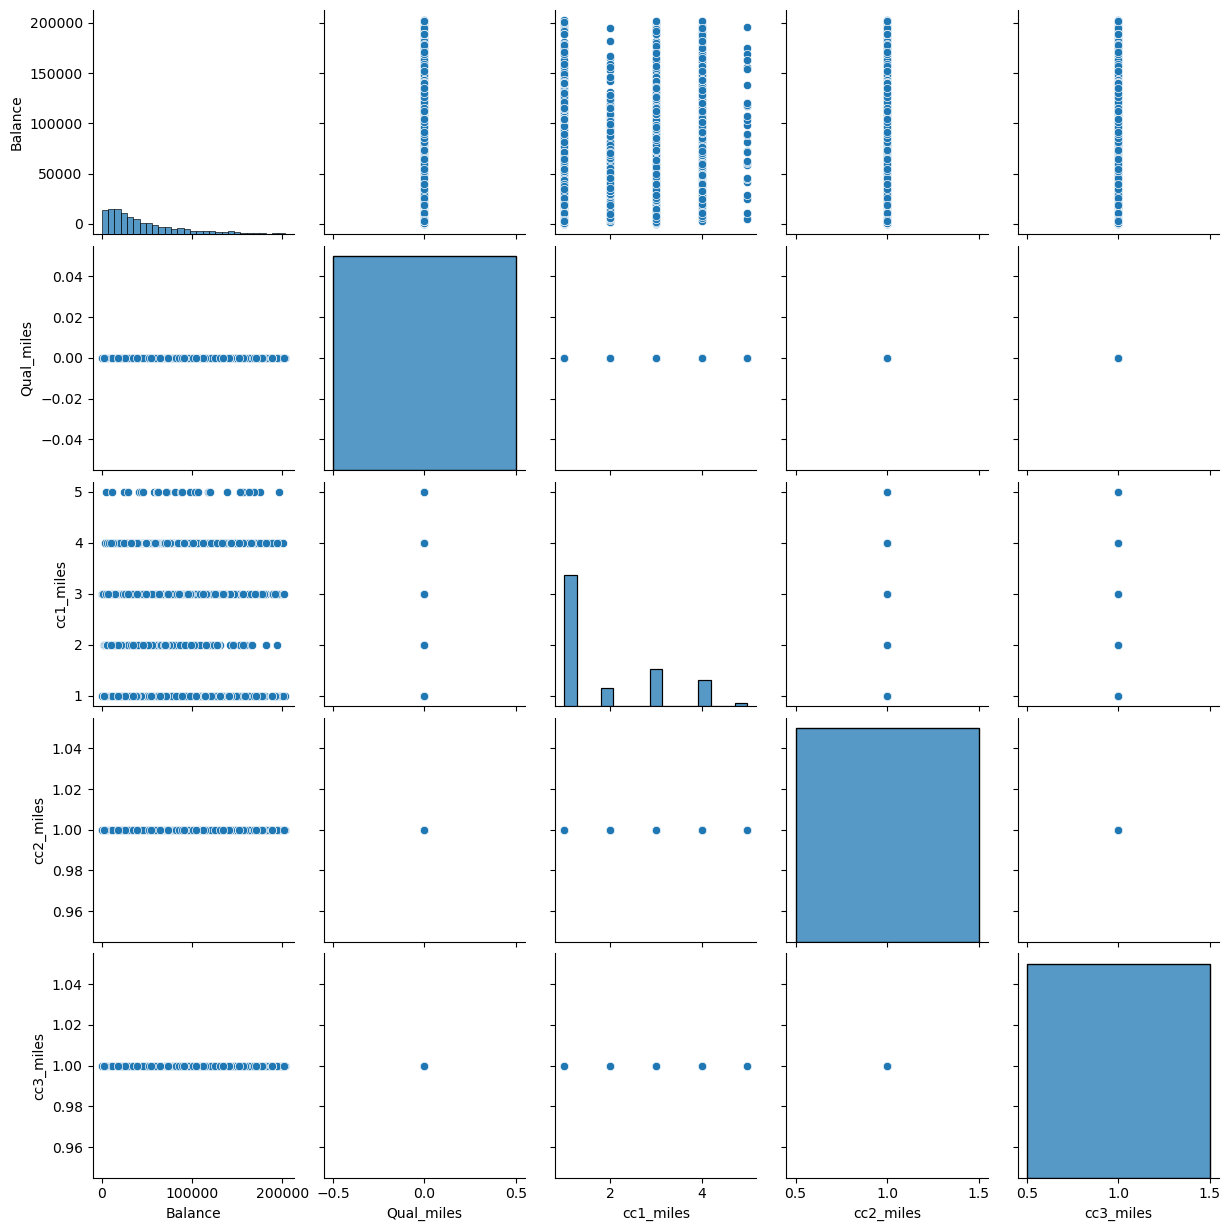

In [33]:
sns.pairplot(df_clean.iloc[:, :5])
plt.show()


## 3. K-Means Clustering
### 1️⃣ Elbow method to find optimal K

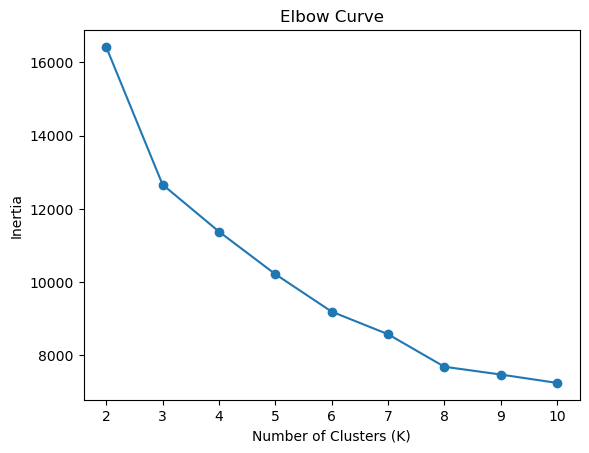

In [36]:
from sklearn.cluster import KMeans

inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()


Optimal K = 3 or 4 (usually).

### 2️⃣ Apply K-Means

In [40]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)


### 3️⃣ Evaluation (Silhouette Score)

In [43]:
from sklearn.metrics import silhouette_score

print("Silhouette Score (K-Means):", silhouette_score(df_scaled, kmeans_labels))


Silhouette Score (K-Means): 0.22962827467448732


### 4️⃣ Visualization (PCA for 2D)

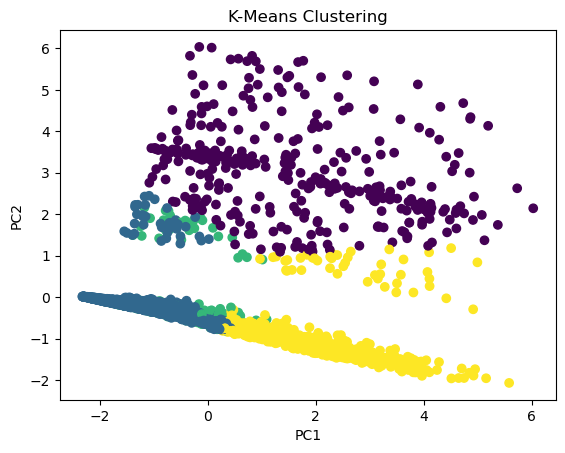

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.scatter(df_pca[:,0], df_pca[:,1], c=kmeans_labels, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering")
plt.show()


## 4. DBSCAN Clustering
### 1️⃣ Apply DBSCAN

In [49]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)


### 2️⃣ Number of clusters

In [52]:
set(dbscan_labels)


{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

-1 → Noise points

### 3️⃣ Evaluation

In [56]:
# Remove noise points
mask = dbscan_labels != -1

print("Silhouette Score (DBSCAN):",
      silhouette_score(df_scaled[mask], dbscan_labels[mask]))


Silhouette Score (DBSCAN): 0.24912005546199273


### 4️⃣ Visualization

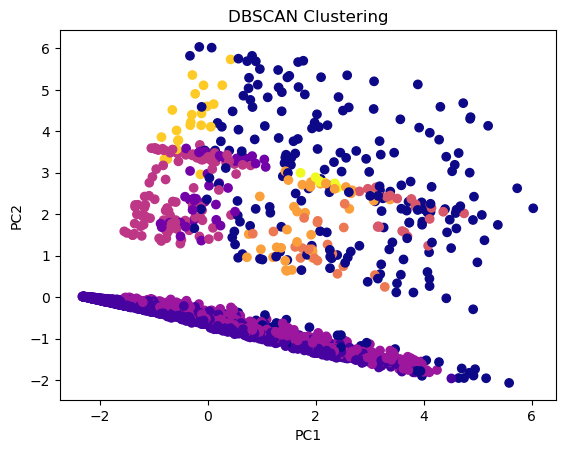

In [63]:
plt.scatter(df_pca[:,0], df_pca[:,1], c=dbscan_labels, cmap='plasma')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Clustering")
plt.show()


## 5. Cluster Analysis & Interpretation
### K-Means Insights

Produces well-balanced clusters

Assumes spherical cluster shapes

Requires predefined K

Performs well on scaled numerical data

### DBSCAN Insights

Identifies noise and outliers

Does not require number of clusters

Sensitive to eps and min_samples

Works best with density-based clusters

## 6. Comparison Summary
| Aspect           | K-Means   | DBSCAN      |
| ---------------- | --------- | ----------- |
| Cluster Shape    | Spherical | Arbitrary   |
| Outlier Handling | ❌ No      | ✅ Yes       |
| Parameters       | K         | eps, minPts |
| Scalability      | High      | Medium      |
## 7. Conclusion & Insights (WRITE THIS)

In this assignment, K-Means and DBSCAN clustering algorithms were applied to the EastWestAirlines dataset. K-Means produced well-defined clusters with higher silhouette scores, making it suitable for customer segmentation. DBSCAN successfully identified noise points and handled outliers but was sensitive to parameter selection. Overall, K-Means is preferred for structured numerical datasets, while DBSCAN is effective when noise detection is important.